# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
unit="metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(url +"appid="+ weather_api_key + "&q=" + city+"&units="+unit).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url +"appid="+ weather_api_key + "&q=" + city+"&units="+unit).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | nar'yan-mar
Processing Record 4 of Set 1 | el daein
City not found. Skipping...
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | aasiaat
Processing Record 7 of Set 1 | fonadhoo
City not found. Skipping...
Processing Record 8 of Set 1 | juazeirinho
Processing Record 9 of Set 1 | the pas
Processing Record 10 of Set 1 | kerikeri
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | safi
Processing Record 13 of Set 1 | am djarass
City not found. Skipping...
Processing Record 14 of Set 1 | smidovich
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | rayside-balfour
City not found. Skipping...
Processing Record 19 of Set 1 | toga village
City not found. Skipping...
Processing Record 20

In [12]:
response=requests.get(url +"appid="+ weather_api_key + "&q=" + city+"&units="+unit).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 42},
 'cod': 200,
 'coord': {'lat': 22.782, 'lon': 115.3475},
 'dt': 1695857110,
 'id': 1795928,
 'main': {'feels_like': 29.83,
          'grnd_level': 1011,
          'humidity': 78,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 27.13,
          'temp_max': 27.13,
          'temp_min': 27.13},
 'name': 'Shanwei',
 'sys': {'country': 'CN', 'sunrise': 1695852531, 'sunset': 1695895806},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 48, 'gust': 8.12, 'speed': 4.39}}


In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-1.54,95,100,2.88,RU,1695856969
1,anadyr,64.7500,177.4833,5.28,80,75,5.00,RU,1695856969
2,nar'yan-mar,67.6713,53.0870,8.98,92,97,6.15,RU,1695856969
3,qaqortoq,60.7167,-46.0333,2.24,87,100,4.93,GL,1695856969
4,aasiaat,68.7098,-52.8699,0.11,70,100,0.20,GL,1695856970


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-1.54,95,100,2.88,RU,1695856969
1,anadyr,64.7500,177.4833,5.28,80,75,5.00,RU,1695856969
2,nar'yan-mar,67.6713,53.0870,8.98,92,97,6.15,RU,1695856969
3,qaqortoq,60.7167,-46.0333,2.24,87,100,4.93,GL,1695856969
4,aasiaat,68.7098,-52.8699,0.11,70,100,0.20,GL,1695856970


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

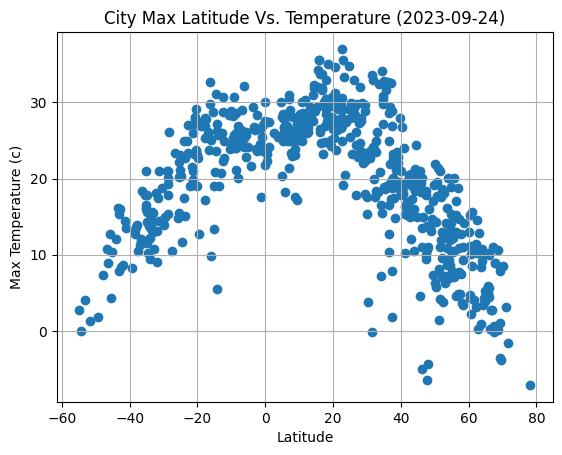

In [17]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df["Lat"]
y_values=city_data_df["Max Temp"]

plt.scatter(x_values,y_values,marker="o")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title("City Max Latitude Vs. Temperature (2023-09-24)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

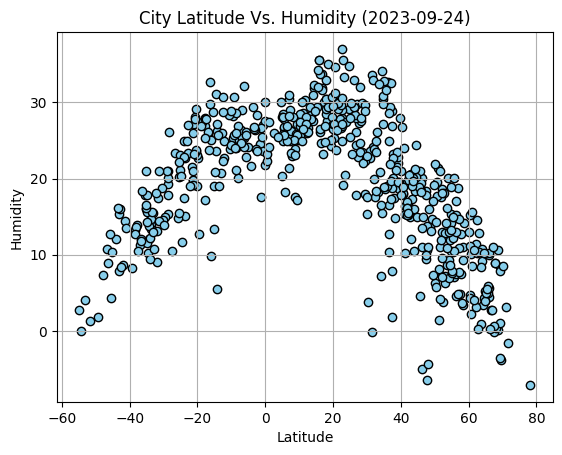

In [18]:
# Build the scatter plots for latitude vs. humidity
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Humidity"]

plt.scatter(x_values,y_values,marker="o",edgecolors="black",facecolors="skyblue")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude Vs. Humidity (2023-09-24)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

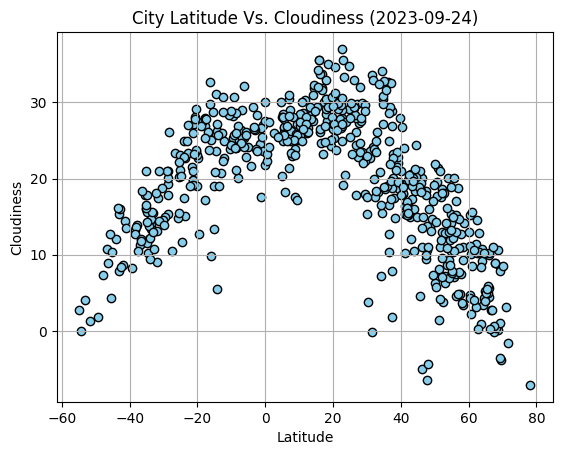

In [19]:
# Build the scatter plots for latitude vs. cloudiness
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Cloudiness"]

plt.scatter(x_values,y_values,marker="o",edgecolors="black",facecolors="skyblue")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude Vs. Cloudiness (2023-09-24)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

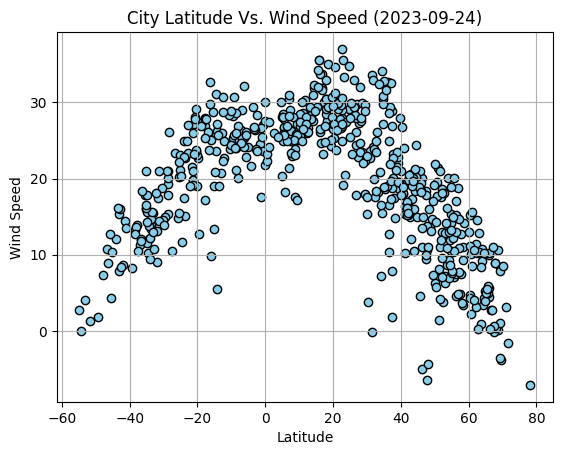

In [20]:
# Build the scatter plots for latitude vs. wind speed
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Wind Speed"]

plt.scatter(x_values,y_values,marker="o",edgecolors="black",facecolors="skyblue")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude Vs. Wind Speed (2023-09-24)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Reference https://gendo90.github.io/python-api-challenge/
# Define a function to create Linear Regression plots
def Linear_regress(df,x_column,y_column,y_label,x_label):
    # date and time for graph title stamp: Reference: Chatgpt search
    date_time=datetime.today().date()
    # regression input values
    (reg_slope, reg_intercept, reg_rvalue, _, _) = linregress(x_column,y_column)
    regress_value_x=np.array([a for a in range(int(min(x_column.values)),int(max(y_column.values)))])
    regress_values_y = x_column * reg_slope + reg_intercept
    plt.scatter(x_column,y_column)
    plt.plot(x_column,regress_values_y,"r")
   
    line_eq="y = {:.2f} x + {:.2f}".format(reg_slope, reg_intercept)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{str(x_label)} Vs {(str(y_label))} Date: {date_time}')
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")
    plt.show()
    
    #output of best fit line
    print("best fit line equation is  y = {:.2f} x + {:.2f}".format(reg_slope, reg_intercept))
    print("correlation coeffecient , r-value is = {:.2f}".format(reg_rvalue))


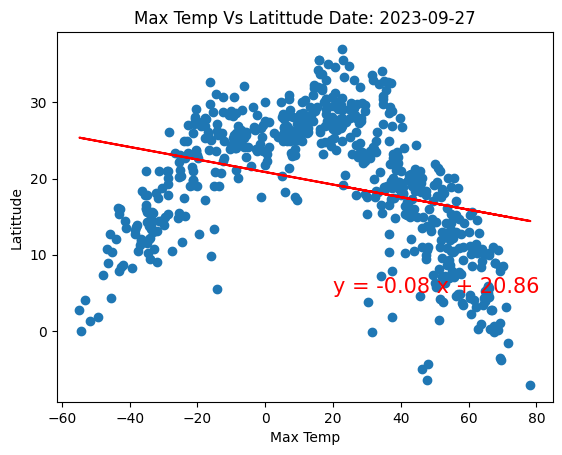

best fit line equation is  y = -0.08 x + 20.86
correlation coeffecient , r-value is = -0.30


In [55]:
Linear_regress(city_data_df,city_data_df["Lat"],city_data_df["Max Temp"],"Latittude","Max Temp")

In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >=0,:]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-1.54,95,100,2.88,RU,1695856969
1,anadyr,64.7500,177.4833,5.28,80,75,5.00,RU,1695856969
2,nar'yan-mar,67.6713,53.0870,8.98,92,97,6.15,RU,1695856969
3,qaqortoq,60.7167,-46.0333,2.24,87,100,4.93,GL,1695856969
4,aasiaat,68.7098,-52.8699,0.11,70,100,0.20,GL,1695856970


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0,:]



# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,juazeirinho,-6.8167,-38.0500,29.02,42,18,6.86,BR,1695856970
7,kerikeri,-35.2268,173.9474,16.06,86,14,1.79,NZ,1695856971
11,waitangi,-43.9535,-176.5597,12.12,92,81,3.13,NZ,1695856971
12,grytviken,-54.2811,-36.5092,-0.07,83,27,4.82,GS,1695856972
13,geraldton,-28.7667,114.6000,19.23,77,80,3.60,AU,1695856972


In [58]:
northern_hemi_df.count()

City          412
Lat           412
Lng           412
Max Temp      412
Humidity      412
Cloudiness    412
Wind Speed    412
Country       412
Date          412
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

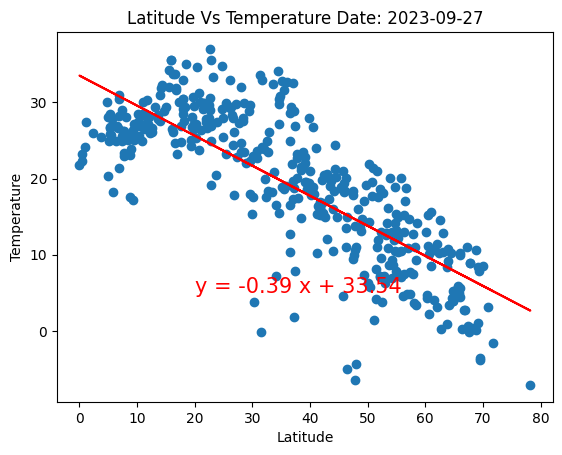

best fit line equation is  y = -0.39 x + 33.54
correlation coeffecient , r-value is = -0.80


In [59]:
# Linear regression on Northern Hemisphere
Linear_regress(northern_hemi_df,northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Temperature","Latitude")


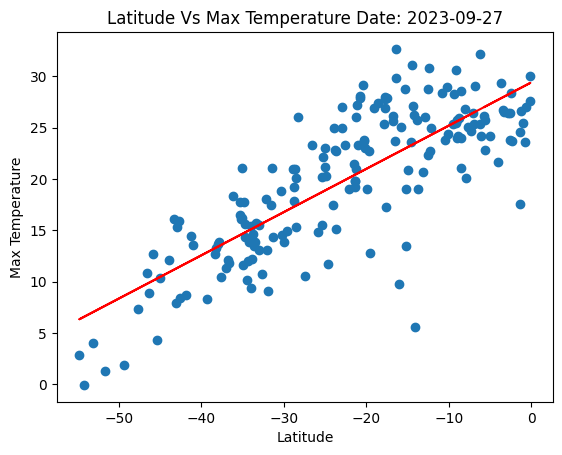

best fit line equation is  y = 0.42 x + 29.41
correlation coeffecient , r-value is = 0.80


In [61]:
# Linear regression on Southern Hemisphere
Linear_regress(southern_hemi_df,southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temperature","Latitude")

**Discussion about the linear relationship:** Relationship between southern and northern hemishpere Max Temperature is directly an indirectly related respectively. R-value is 0.80 and -0.80 which indicates data is close to line.

### Humidity vs. Latitude Linear Regression Plot

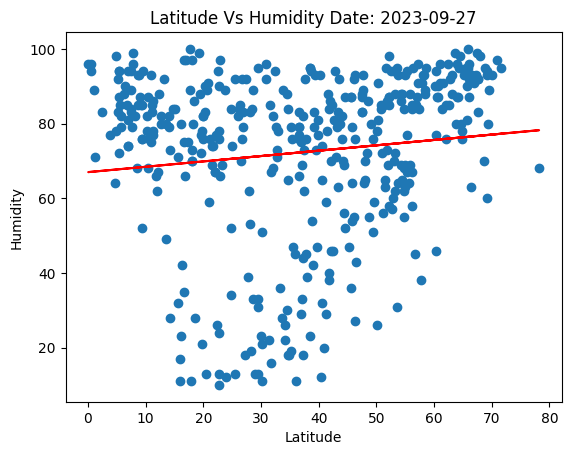

best fit line equation is  y = 0.14 x + 66.99
correlation coeffecient , r-value is = 0.12


In [62]:
# Northern Hemisphere
Linear_regress(northern_hemi_df,northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity","Latitude")

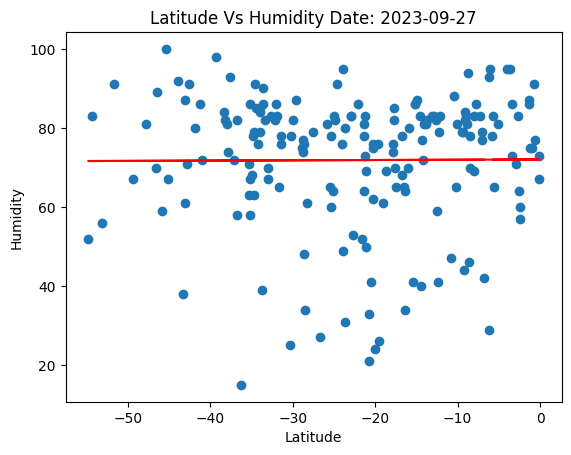

best fit line equation is  y = 0.01 x + 72.04
correlation coeffecient , r-value is = 0.01


In [63]:
# Southern Hemisphere
Linear_regress(southern_hemi_df,southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity","Latitude")

**Discussion about the linear relationship:** Humidity in norther and southern Hemisphere shows data scattered away from the line. R-Value is close to 0. which shows scattered Data.

### Cloudiness vs. Latitude Linear Regression Plot

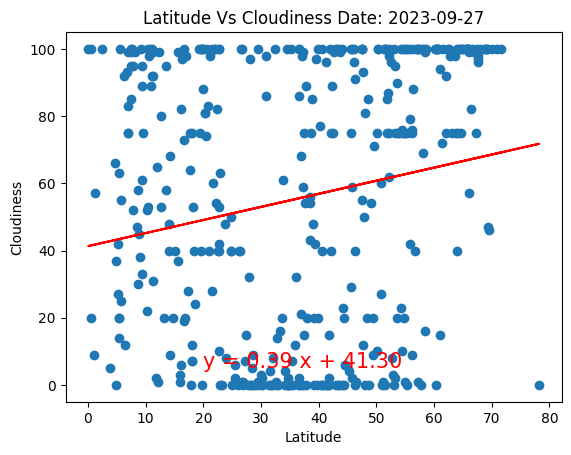

best fit line equation is  y = 0.39 x + 41.30
correlation coeffecient , r-value is = 0.19


In [64]:
# Northern Hemisphere
Linear_regress(northern_hemi_df,northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness","Latitude")

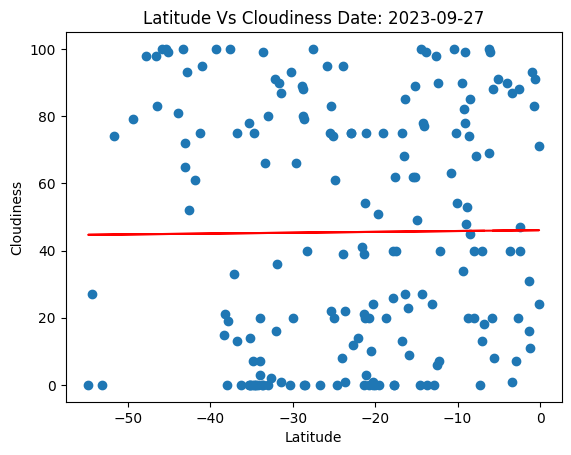

best fit line equation is  y = 0.03 x + 46.06
correlation coeffecient , r-value is = 0.01


In [65]:
# Southern Hemisphere
Linear_regress(southern_hemi_df,southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness","Latitude")

**Discussion about the linear relationship:** cloudiness in northern Hemispher close to line.while southern Hemishpere data shows scattering. there is direct relation ship between increase in Latitiude and and increase in cloudiness in northern Hemishphere.

### Wind Speed vs. Latitude Linear Regression Plot

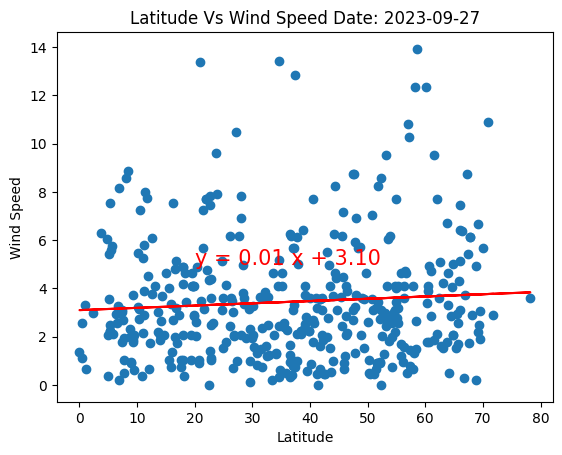

best fit line equation is  y = 0.01 x + 3.10
correlation coeffecient , r-value is = 0.07


In [66]:
# Northern Hemisphere
Linear_regress(northern_hemi_df,northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed","Latitude")

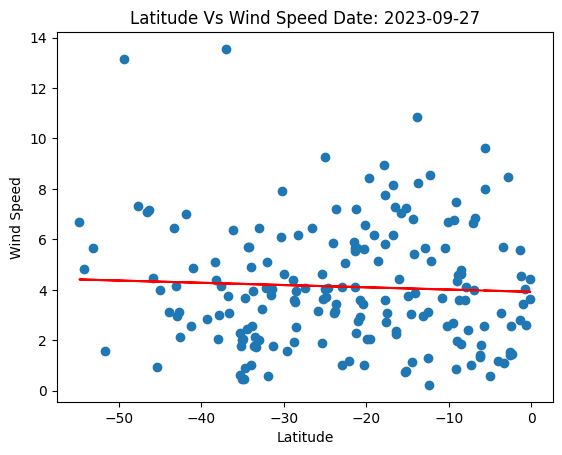

best fit line equation is  y = -0.01 x + 3.92
correlation coeffecient , r-value is = -0.05


In [67]:
# Southern Hemisphere
Linear_regress(southern_hemi_df,southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed","Latitude")

**Discussion about the linear relationship:** wind speed shows fairly netural trend with latitude. Data points are scattered away from line and r-value close to zero indicates, data points and not closely related.